In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [16]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [17]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Взял выборку из всего датасета для наглядности

In [29]:
df = pd.read_csv(r"F:\DS\TS\train\weather_test.csv")[0:2000]

In [30]:
df.shape

(2000, 9)

In [31]:
df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [32]:
df['sea_level_pressure'].fillna((df['sea_level_pressure'].mean()), inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
site_id               2000 non-null int64
timestamp             2000 non-null object
air_temperature       2000 non-null float64
cloud_coverage        1282 non-null float64
dew_temperature       2000 non-null float64
precip_depth_1_hr     1999 non-null float64
sea_level_pressure    2000 non-null float64
wind_direction        1956 non-null float64
wind_speed            2000 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 140.7+ KB


In [34]:
series=df['sea_level_pressure']

Results of Dickey-Fuller Test:
Test Statistic                -5.692392e+00
p-value                        8.015582e-07
#Lags Used                     2.600000e+01
Number of Observations Used    1.973000e+03
Critical Value (1%)           -3.433669e+00
Critical Value (5%)           -2.863006e+00
Critical Value (10%)          -2.567550e+00
dtype: float64


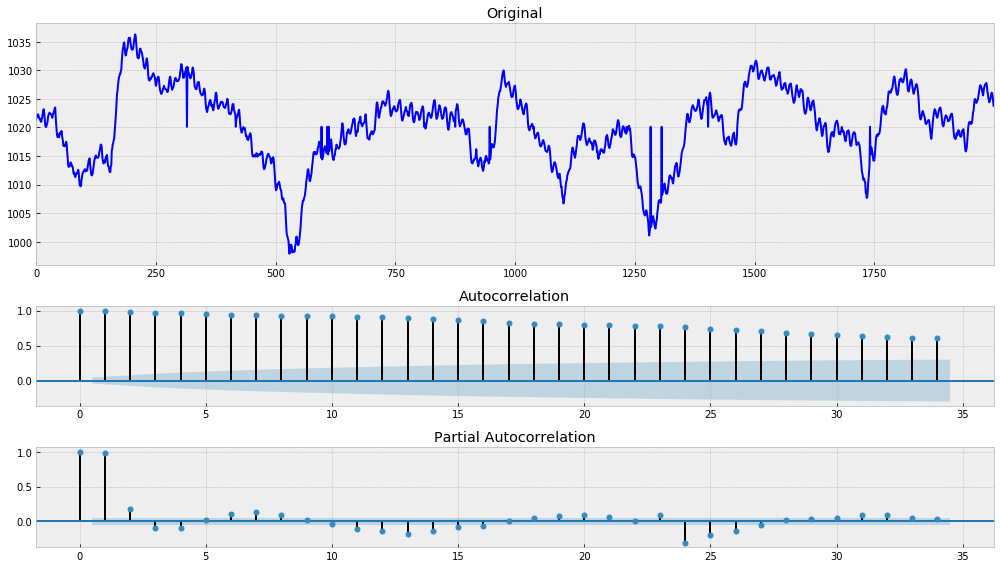

In [35]:
tsplot(series)

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [36]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                -5.691871e+00
p-value                        8.036569e-07
#Lags Used                     2.600000e+01
Number of Observations Used    1.973000e+03
Critical Value (1%)           -3.433669e+00
Critical Value (5%)           -2.863006e+00
Critical Value (10%)          -2.567550e+00
dtype: float64


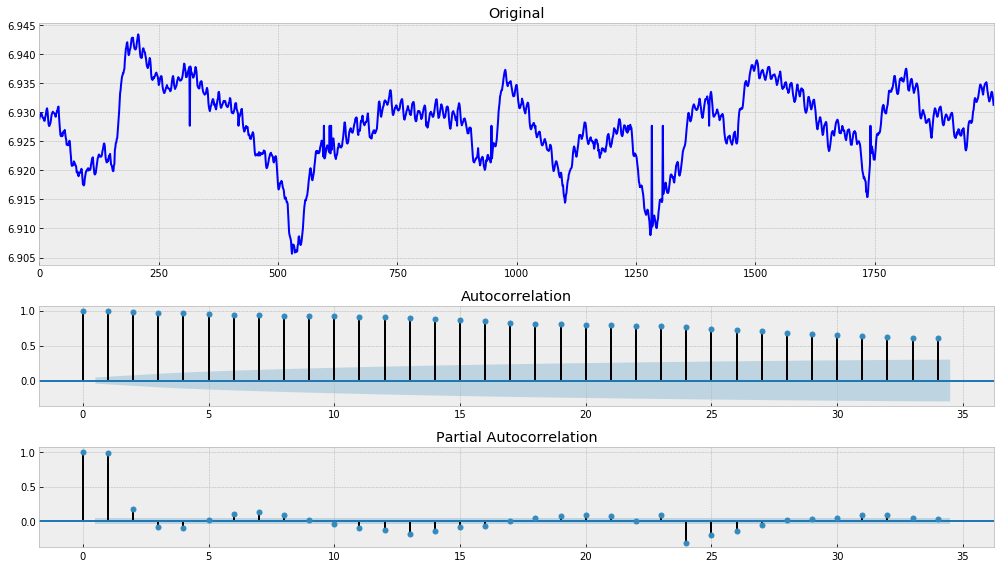

In [37]:
tsplot(series)

Сделаем дифференцирование.

In [42]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.563504e+01
p-value                        1.667060e-28
#Lags Used                     2.600000e+01
Number of Observations Used    1.959000e+03
Critical Value (1%)           -3.433692e+00
Critical Value (5%)           -2.863017e+00
Critical Value (10%)          -2.567556e+00
dtype: float64


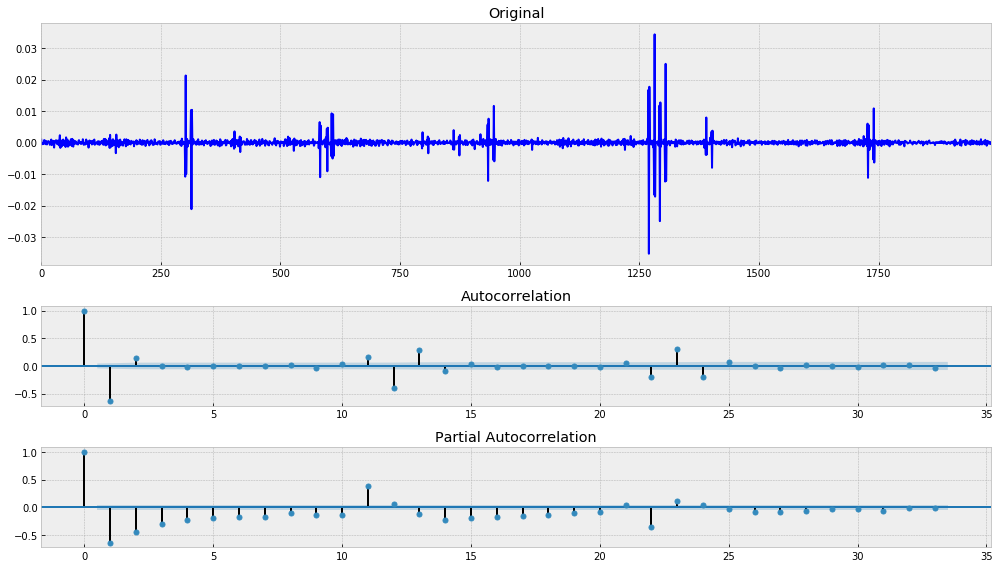

In [43]:
tsplot(series)

Теперь видно по тесту Дики-Фуллера и графикам коррелограмм, что ряд стационарный.